In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Provide the full path to your CSV file
file_path = r"C:\Users\SR116\OneDrive\Documents\GitHub\Eumexxx\eCommerce Project\ecommerceData.csv"

# Read the CSV file
df = pd.read_csv(file_path, encoding='iso-8859-1')


In [141]:
# Display the first few rows of the dataframe
print(df.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75  

In [142]:
missing_values = df.isnull().sum()

In [143]:
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [144]:
#This code will replace any null values in description column with "no description"
df['Description'].fillna('No Description', inplace=True)

C:\Users\SR116\AppData\Local\Temp\ipykernel_30692\1829798723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('No Description', inplace=True)


In [145]:
df = df.dropna(subset=['CustomerID'])

In [146]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [147]:
# Remove any rows where unity price or quanity is <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [148]:
summary_statistics = df.describe()
print(summary_statistics)

            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

          CustomerID  
count  397884.000000  
mean    15294.423453  
min     12346.000000  
25%     13969.000000  
50%     15159.000000  
75%     16795.000000  
max     18287.000000  
std      1713.141560  


In [149]:
# Count the Distinct items sold
distinct_items_count = df['Description'].nunique()
print(distinct_items_count)

3877


In [150]:
# What are the total sales
df['Sales'] = df['Quantity'] * df['UnitPrice']


In [151]:
top_items = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)

In [152]:
print(top_items)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Sales, dtype: float64


In [153]:
# Product popularity: want to determine what are the most popular products based on quantities.

In [154]:
# Revenue Generations: We want to calculate the total revenue generated by each product by multyplying by quanity

In [155]:
# Product trends over time: analyzing how popular a rproduct over time

In [156]:
# Stock Code Analysis: Investigate if certain types of stock codes are associated with higher sales or revenue

In [157]:
# product description analysis

In [158]:
# group by description to aggregate data by product
# sum that quantity colum to get the total quantity sold of each product
# sort the results in descending order to get the most popular products

In [159]:
product_sales = df.groupby('Description').agg(Total_Quantity_Sold=('Quantity','sum')).reset_index()

In [160]:
# display the top 10 most popular products

In [161]:
product_sales_sorted = product_sales.sort_values(by='Total_Quantity_Sold', ascending=False)

top_10_products = product_sales_sorted.head(10)


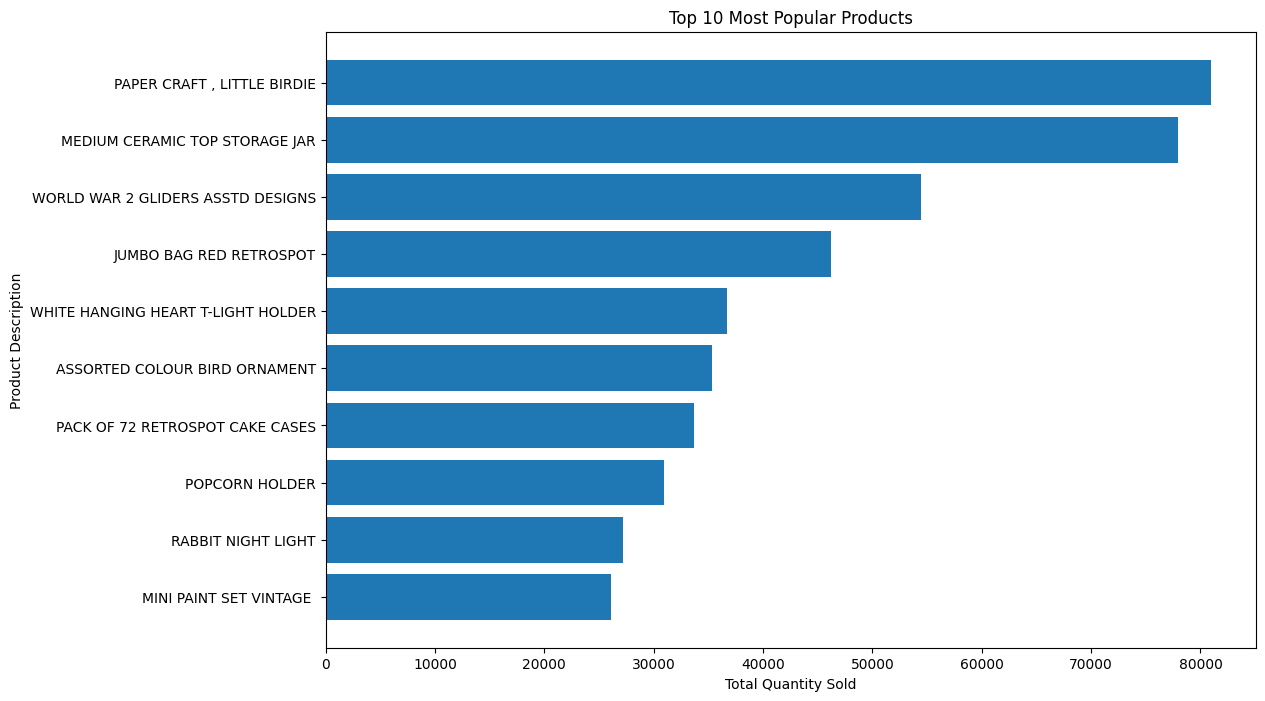

In [162]:
plt.figure(figsize=(12,8))
plt.barh(top_10_products['Description'], top_10_products['Total_Quantity_Sold'])
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Most Popular Products')
plt.gca().invert_yaxis()
plt.show()

In [163]:
# Time Series Analysis of the sales of world war 2 gliders

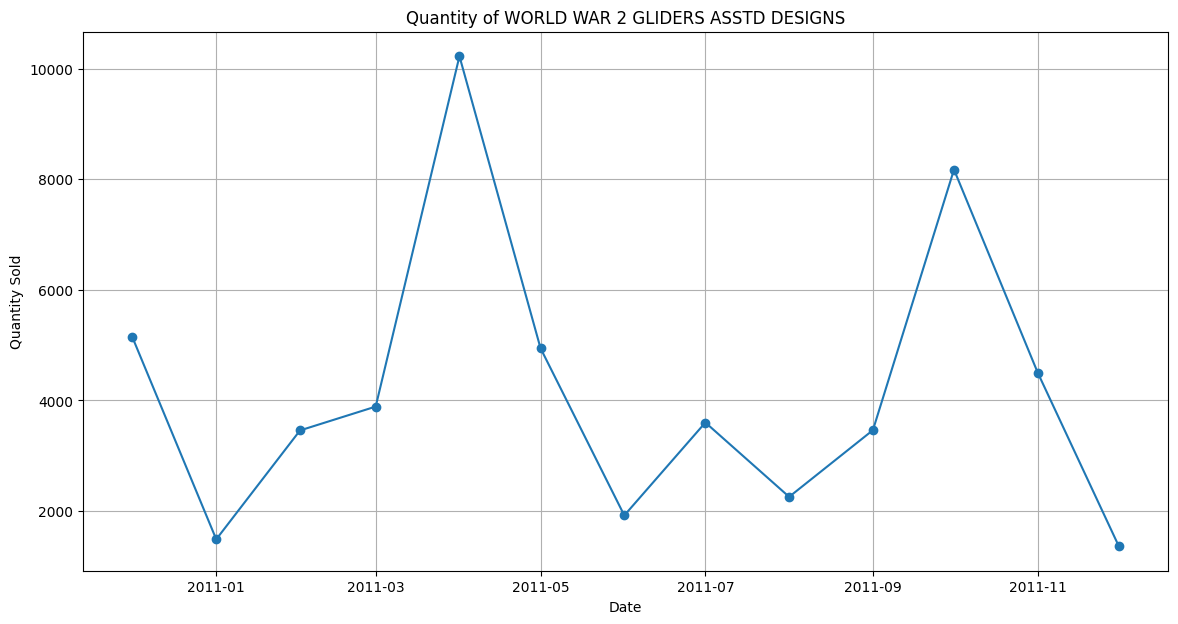

In [177]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
gliders_data = df[df['Description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']
gliders_sales_over_time = gliders_data.groupby(gliders_data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum().reset_index()
gliders_sales_over_time['InvoiceDate'] = gliders_sales_over_time['InvoiceDate'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
plt.plot(gliders_sales_over_time['InvoiceDate'], gliders_sales_over_time['Quantity'], marker='o')
plt.title('Quantity of WORLD WAR 2 GLIDERS ASSTD DESIGNS')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

In [183]:
pip install scipy

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.6 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/45.9 MB 11.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.8/45.9 MB 35.6 MB/s eta 0:00:02
   ---- ----------------------------------- 5.4/45.9 MB 43.0 MB/s eta 0:00:01
   ------ --------------------------------- 7.0/45.9 MB 40.8 MB/s eta 0:00:01
   ----------- ---------------------------- 13.2/45.9 MB 81.8 MB/s eta 0:00:01
   -------------- ------------------------- 16.3/45.9 MB 81.8 MB/s eta 0:00:01
   ----------------- ---------------------- 19.5/45.9 MB 81.8 MB/s eta 0:00:01
   ------------------- -------------------- 22.7/45.9 MB 72.6 MB/s eta 0:00:01
   ---------------------- ----------------- 25.9/45.9 MB 72.6 MB/s eta

In [184]:
# is there a significant different in sales during the holidays months (november) to march

In [185]:
from scipy import stats

In [186]:
november_sales = df[(df['InvoiceDate'].dt.month == 11) & (df['InvoiceDate'].dt.year == 2011)]['Quantity']

In [187]:
march_sales = df[(df['InvoiceDate'].dt.month == 3) & (df['InvoiceDate'].dt.year == 2011)]['Quantity']

In [188]:
print(stats.shapiro(november_sales))
print(stats.shapiro(march_sales))

ShapiroResult(statistic=0.2023783492268756, pvalue=6.079287240738706e-164)
ShapiroResult(statistic=0.2144099524376326, pvalue=6.849959798204455e-138)


C:\Users\SR116\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 64531.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\SR116\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27175.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# check for variances


In [189]:
print(stats.levene(november_sales, march_sales))

LeveneResult(statistic=63.07248177574732, pvalue=2.014785403826302e-15)


In [190]:
t_stat, p_value = stats.ttest_ind(november_sales, march_sales, equal_var=False)

In [191]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -8.844858351959235
P-value: 9.508165097584817e-19
